# Visualisierung und Analyse von numerischen Algorithmen

## Skalare Felder

In den Anwendungen treten sehr häufig sogenannte *skalare Felder* auf. Simpel formuliert sind dies Funktionen von zwei reellen Variablen mit einer reellen Zahl als Funktionswert:
\begin{equation}
z = f(x, y)
\end{equation}.
Beispiele für solche Funktionen sind folgende Funktionsvorschriften:
1. $f(x, y) = x^3 - 3x + y^4 - 2y^2$,
1. die Rosenbrock-Funktion $f(x, y) = (1-x)^2 + 100*(y-x^2)^2$

Die Rosenbrock-Banane ist ein häufig verwendetes Beispiel für Benchmarks verschiedener Algorithmen und steht sogar als Funktion in SciPy direkt zur Verfügung. In Büchern zum Thema Vektoranalysis und im Skript der Vorlesung *Computerorientierte Mathematik* finden wir viele weitere Funktionen $f(x, y)$.

## Visualisierung von skalaren Feldern

Die berechneten z-Werte können wir als Höhenwerte eines Terrains interpretieren. Damit werden direkt dreidimensionale Darstellungen möglich. Wir verwenden zwei alternative Darstellungen, mit Hilfe von Isolinien und einmals als Heatmap.
Für alle Darstellungen diskretisieren wir den Definitionsbereich für $(x, y)$ als meshgrid in Python, berechnen damit die Funktionswerte und übergeben dies an Matplotlib oder Plotly für die grafische Darstellung.

Wir importieren alle Packages, die wir verwenden: NumPy, SciPy und Matplotlib. Anschließend implementieren wir eines der Beispiele eines skalaren Felds. Wir wählen einen Definitionsbereich aus und berechnen ein meshgrid.

In [86]:
import numpy as np
import matplotlib.pyplot as plt

from matplotlib import cm
from scipy import optimize

# Version der Funktion für den Optimieren in Scipy
def f(x):
    return x[0]**3 - 3.0*x[0] + x[1]**4 - 2.0*x[1]**2


# Version der Funktion für die Visualisierung
def f_Vis(x, y):
    return x**3 - 3.0*x + y**4 - 2.0*y**2

# Definitionsbereich festlegen
xmin = -2.5
xmax = 2.5
ymin = -2.5
ymax = 2.5
# Anzahl der Werte in x- und y-Richtung
n = 1000
x = np.linspace(xmin, xmax, n)
y = np.linspace(ymin, ymax, n)
# NumPy meshgrid erzeugen
x, y = np.meshgrid(x, y)
# Jetzt können wir die Funktionswerte mit einem Aufruf berechnen
z = f_Vis(x, y)

### Isolinien

Isolinien sind Kurven, für die die Funktion $f$ den identischen Funktionswert hat. Wir kennen solche Darstellungen zu Beispiel aus dem Wetterbericht, dort werden *Isobaren* dargestellt - Kurven mit gleichem Luftdruck.


Text(0, 0.5, 'Konturwerte')

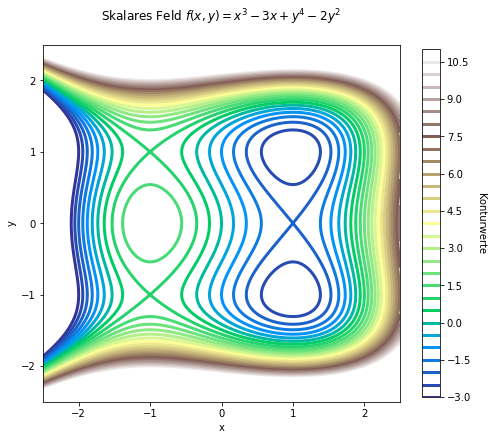

In [87]:
# Festlegen, für welche Werte wir die Isolinien visualisieren möchten
Cmin = -3
Cmax = 11
Cstep = 0.5
levels = np.arange(Cmin, Cmax+Cstep, Cstep)

fig = plt.figure(figsize=(8.0, 8.0))
ax = fig.add_subplot(111)
ax.set_aspect('equal')

# Ausgabe von Isolinien mit matplotlib.contour
cplot = plt.contour(x, y, z, 
                    levels=levels,
                    cmap=cm.terrain,
                    linewidths=3,
                    origin='lower',
                    extent=(xmin, xmax, ymin, ymax))
plt.xlabel('x')
plt.ylabel('y')


plt.title('Skalares Feld $f(x, y) = x^3 - 3x + y^4 - 2y^2$',
          y=1.05,
          fontsize=12)

cbar = plt.colorbar(cplot, shrink=0.8)
cbar.ax.get_yaxis().labelpad = 15
cbar.ax.set_ylabel('Konturwerte', rotation=270)

### Heatmap
Statt der Isolinien können wir die Höhenwerte in jedem *Pixel* als Heatmap visualisieren. Damit erhalten
wir eine Darstellung, die einer Landkarte ähnelt.

Dazu verwenden wir wieder den meshgrid, der mit seiner Anzahl von Zeilen und Spalten die Dimension der Bitmap festlegt die wir erzeugen. Wir geben die z-Werte an und verwenden wieder eine Farbtabelle. Als Funktion aus Matplotlib verwenden wir *imshow*. Die Achsenbeschriftung müssen wir manuell hinzufügen, da die Ausgabe von imshow eine Bitmap ist, die keine x- und y-Achse mehr kennt. Die Funktion imshow verwendet ein Koordinatensystem einer Bitmap. Damit wir wieder in einem kartesischen Koordinatensystem arbeiten können verwenden wir die Option *origin=low*.

Text(0, 0.5, 'Funktionswerte')

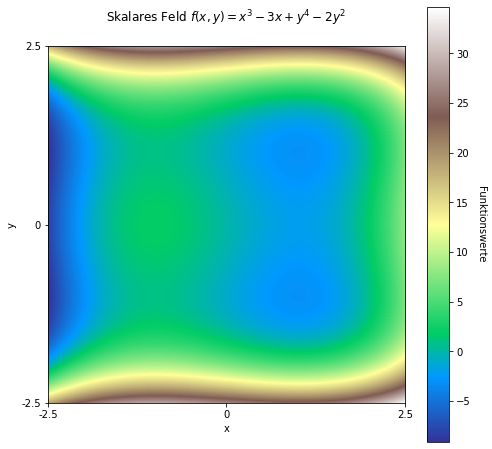

In [88]:
fig = plt.figure(figsize=(8.0, 8.0))
ax = fig.add_subplot(111)
ax.set_aspect('equal')

plt.xticks([0, n/2-1, n-1], ['-2.5', '0', '2.5'])
plt.yticks([0, n/2-1, n-1], ['-2.5', '0', '2.5'])
plt.xlabel('x')
plt.ylabel('y')

ax = plt.imshow(z, 
                cmap=cm.terrain, 
                origin='lower')

plt.title('Skalares Feld $f(x, y) = x^3 - 3x + y^4 - 2y^2$',
          y=1.05, 
          fontsize=12)

cbar = fig.colorbar(ax)
cbar.ax.get_yaxis().labelpad = 15
cbar.ax.set_ylabel('Funktionswerte', rotation=270)

Wir können selbstverständlich auch andere sequentielle Farbpaletten wie zum Beispiel *coolwarm* verwenden wie im folgenden Bild.

Text(0, 0.5, 'Funktionswerte')

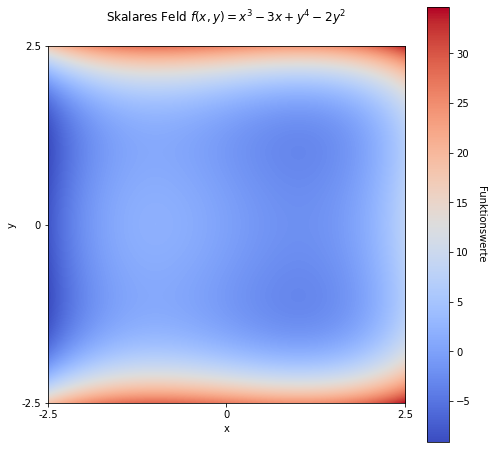

In [89]:
fig = plt.figure(figsize=(8.0, 8.0))
ax = fig.add_subplot(111)
ax.set_aspect('equal')

plt.xticks([0, n/2-1, n-1], ['-2.5', '0', '2.5'])
plt.yticks([0, n/2-1, n-1], ['-2.5', '0', '2.5'])
plt.xlabel('x')
plt.ylabel('y')

ax = plt.imshow(z, 
                cmap=cm.coolwarm, 
                origin='lower')

plt.title('Skalares Feld $f(x, y) = x^3 - 3x + y^4 - 2y^2$',
          y=1.05, 
          fontsize=12)

cbar = fig.colorbar(ax)
cbar.ax.get_yaxis().labelpad = 15
cbar.ax.set_ylabel('Funktionswerte', rotation=270)

## Minimierung von skalaren Feldern

Wie in der Analysis suchen wir auch für diese Funktion $f(x, y)$ Punkte $(x, y)$, für die der Funktionswert ein lokales Minimum darstellt. Wenn wir bei der Metapher einer Landschaft mit Höhenwerte bleiben suchen wir also den tiefsten Punkt in einer Tal.

Genau wie für die Funktionen $f(x)$ gibt es auch für skalare Felder notwendige und hinreichende Kriterien. Aber in den Anwendungen können wir diese Kriterien selten verwenden um auf dem Papier ein lokales Minimum zu bestimmen. Deshalb gibt es im wissenschaftlichen Rechnen das Gebiet der __Nichtlinearen Optimierung__, die sich mit der numerischen Bestimmung von lokalen Minimam solcher Funktionen auseinandersetzt.

Dafür gibt es sogenannte __Abstiegsverfahren__, die immer den gleichen Aufbau haben:
1. Wir legen einen Startpunkt $(x_0, y_0)$ fest, an dem das Verfahren beginnt.
1. Wir berechnen eine *Suchrichtung*, in der wir uns bewegen.
1. Wir bestimmen eine *Schrittweite*, mit der wir in Richtung der Suchrichtung gehen, um eine neue Näherung zu berechnen.
1. Wir überprüfen, ob die Abbruchkriterien erfüllt sind. Falls ja stoppt die Iteration, falls nein berechnen wir eine neue Suchrichtung und führen eine weitere Iteration durch.

In SciPy gibt es das Package *optimize*, in der solche Algorithmen implementiert sind. Dabei können wir immer die gleiche SciPy-Funktion aufrufen und mit einem Parameter das gewünschte Verfahren auswählen.

Wir implementieren die Funktion, die wir minimieren möchten. Dabei schreibt SciPy vor, dass die übergebene Funktion ein Array als Argument hat. Deshalb verwenden wir hier die oben implementierte Funktion *f*. 
Wir legen einen Startwert fest, rufen dann *optimize.minimize* auf und können anschließend die berechneten Ergebnis ausgeben.
Als Beispiel verwenden wir hier das Newton-Verfahren.

Viele Verfahren, auch Newton, verlangen neben der Auswertung der Funktion auch den Gradienten, der Vektor der ersten Ableitngen. Deshalb implementieren wir hier noch die Funktion *gradient* und übergeben Sie.

In [90]:
# Erste Ableitungen im Gradienten
def gradient(x):
    return np.array([3.0*x[0]**2-3.0, 4.0*x[1]**3-4.0*x[1]])



# Startwert festlegen
x_0 = np.array([2.0, 2.0])

result = optimize.minimize(f, 
                           x_0,
                           method='Newton-CG',
                           jac=gradient,
                           tol = 1.0e-3
                          )
if result.success:
    print('Verfahren hat eine Näherung für ein lokales Minimum berechnet.: ', result.x)
    print('Der Funktionswert an diesem Punkt:', result.fun)
    print('Einige Angaben zum Verlauf des Verfahrens:')
    print('Die Funktion f wurde ', result.nfev, '-mal aufgerufen.')
    print('Es wurden ', result.nit, 'Iterationen ausgeführt')

Verfahren hat eine Näherung für ein lokales Minimum berechnet.:  [1.0000003  1.00000012]
Der Funktionswert an diesem Punkt: -2.999999999999668
Einige Angaben zum Verlauf des Verfahrens:
Die Funktion f wurde  6 -mal aufgerufen.
Es wurden  5 Iterationen ausgeführt


## Visualisierungen der Iterationsschritte

Die verschiedenen Verfahren werden einen unterschiedlichen Verlauf haben. Deshalb visualisieren wie die verschiedenen Iterationen in einer Darstellung von f, um damit die Verfahren besser zu verstehen. Die *minimize*-Funktion in SciPy sieht
dafür verschiedene Möglichkeiten vor, auch in Stackoverflow findet man dazu verschiedene Ansätze.

Als erstes Beispiel zeichnen wir den verwendeten Startpunkt aus dem letzten Beispiel und auch den Punkt $(1,1)$ in eine Darstellung mit Isolinien ein. Man kann mit Hilfe der analytischen Kriterien für lokale Extremwerte nachweisen, dass $(1, 1)$ ein lokales Minimum ist.

Text(0, 0.5, 'Konturwerte')

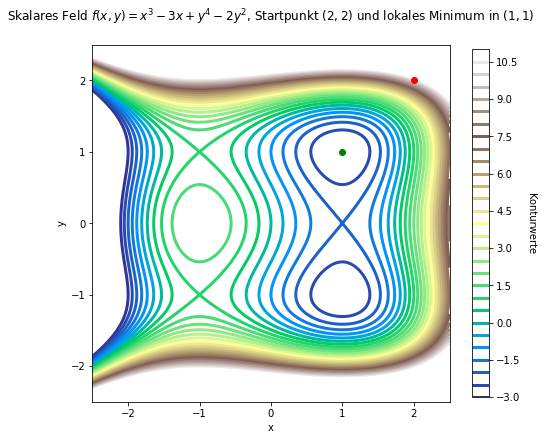

In [91]:
fig = plt.figure(figsize=(8.0, 8.0))
ax = fig.add_subplot(111)
ax.set_aspect('equal')

cplot = plt.contour(x, y, z, 
                    levels=levels,
                    cmap=cm.terrain,
                    linewidths=3,
                    origin='lower',
                    extent=(xmin, xmax, ymin, ymax))
plt.xlabel('x')
plt.ylabel('y')
plt.plot(x_0[0], x_0[1], 'ro')
plt.plot(1.0, 1.0, 'go')
plt.title('Skalares Feld $f(x, y) = x^3 - 3x + y^4 - 2y^2$, Startpunkt $(2, 2)$ und lokales Minimum in $(1, 1)$',
          y=1.05,
          fontsize=12)

cbar = plt.colorbar(cplot, shrink=0.8)
cbar.ax.get_yaxis().labelpad = 15
cbar.ax.set_ylabel('Konturwerte', rotation=270)

In SciPy gibt es die Möglichkeit einer Funktion wie *minimize* eine Funktion als Callback zu übergeben,
die nach jeder Iteration aufgerufen wird. Hier können wir print-Statements einbauen und zum Beispiel immer die aktuelle
Näherung ausgeben. Auf Stackoverflow findet man den Beitrag zu diesem Thema:
[How to display progress of scipy optimize](https://stackoverflow.com/questions/16739065/how-to-display-progress-of-scipy-optimize-function).

In [92]:
# Arrays vorbereiten mit dem Startpunkt, in die wir die Information während der Iteration speichern.
# Nur zur Erinnerung: der Startpunkt steht auf x0.
all_x_i = [x_0[0]]
all_y_i = [x_0[1]]
all_f_i = [f(x_0)] 

def store(X):
        x, y = X
        all_x_i.append(x)
        all_y_i.append(y)
        all_f_i.append(f(X))
        
result = optimize.minimize(f, 
                           x_0,
                           method='Newton-CG',
                           jac=gradient,
                           callback = store,
                           tol = 1.0e-3
                          )
if result.success:
    print('Verfahren hat eine Näherung für ein lokales Minimum berechnet.: ', result.x)
    print('Mehr Informationen zum Ablauf ist auf den Feldern all_x_i, all_y_i und all_f_i gespeichert!')
    print('Der Funktionswert an diesem Punkt:', result.fun)
    print('Einige Angaben zum Verlauf des Verfahrens:')
    print('Die Funktion f wurde ', result.nfev, '-mal aufgerufen.')
    print('Es wurden ', result.nit, 'Iterationen ausgeführt')

Verfahren hat eine Näherung für ein lokales Minimum berechnet.:  [1.0000003  1.00000012]
Mehr Informationen zum Ablauf ist auf den Feldern all_x_i, all_y_i und all_f_i gespeichert!
Der Funktionswert an diesem Punkt: -2.999999999999668
Einige Angaben zum Verlauf des Verfahrens:
Die Funktion f wurde  6 -mal aufgerufen.
Es wurden  5 Iterationen ausgeführt


Wir geben jetzt testhalber das Array all_f_i aus. Hier müssen, wenn die Daten korrekt abgespeichert wurden, Funktionswerte ausgegeben werden, die immer kleiner werden. Wir geben als Kontrolle auch die Funktionswerte am Startwert und
am exakten lokalen Minimum $(1, 1)$ aus.

In [93]:
print('Der Funktionswert am Startpunkt ist', f(x0))
print('Der Funktionswert am lokalen Minimum (1, 1) ist', f_Vis(1.0, 1.0))

print('Die Funktionswerte während der Berechnung')
print(all_f_i)

Der Funktionswert am Startpunkt ist 10.0
Der Funktionswert am lokalen Minimum (1, 1) ist -3.0
Die Funktionswerte während der Berechnung
[10.0, 0.195364029519705, -2.648379670622178, -2.995168586387797, -2.999997864622641, -2.999999999999668]


Die Ausgabe bestätigt, dass unsere Funktion *store* die Werte korrekt speichert. Bevor wir die Punkte in der Iteration grafisch ausgeben geben wir die x- und y-Koordinaten noch mit Python aus.

In [94]:
print('Die Koordinaten der Punkte in der Durchführung des Verfahrens')
print('x-Werte:', all_x_i)
print('y-Werte:', all_y_i)

Die Koordinaten der Punkte in der Durchführung des Verfahrens
x-Werte: [2.0, 1.7753077550510608, 1.3241452067193704, 1.0398494454626357, 1.0007758054147475, 1.0000003017644306]
y-Werte: [2.0, 1.4008206801361618, 1.0239616822671551, 0.9989749446952487, 1.000286877087087, 1.0000001218108707]


Ähnlich wie bereits gezeigt verwenden wir jetzt diese beiden Felder und geben die Punkte und auch einen Polygonzug, der die Punkte verbindet in einer Visualisierung aus.

Text(0, 0.5, 'Konturwerte')

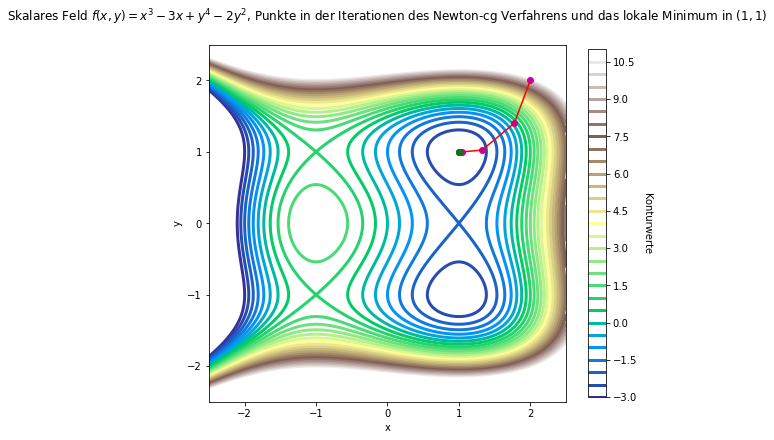

In [95]:
fig = plt.figure(figsize=(8.0, 8.0))
ax = fig.add_subplot(111)
ax.set_aspect('equal')

cplot = plt.contour(x, y, z, 
                    levels=levels,
                    cmap=cm.terrain,
                    linewidths=3,
                    origin='lower',
                    extent=(xmin, xmax, ymin, ymax))
plt.xlabel('x')
plt.ylabel('y')
plt.plot(all_x_i, all_y_i, 'mo')
plt.plot(all_x_i, all_y_i, 'r-')
plt.plot(1.0, 1.0, 'go')
plt.title('Skalares Feld $f(x, y) = x^3 - 3x + y^4 - 2y^2$, Punkte in der Iterationen des Newton-cg Verfahrens und das lokale Minimum in $(1, 1)$',
          y=1.05,
          fontsize=12)

cbar = plt.colorbar(cplot, shrink=0.8)
cbar.ax.get_yaxis().labelpad = 15
cbar.ax.set_ylabel('Konturwerte', rotation=270)

Um das Prinzip zu vertiefen erstellen wir jetzt ein weiteres Beispiel. Wir bleiben bei der Funktion $f$, aber
wir wechseln den Startpunkt und beginnen das Verfahren in der Nähe eines der Sattelpunkte bei $(-0.5, 1.0)$. 
Dabei fassen wir die Berechnung der Näherung und die grafische Ausgabe zusammen und verzichten auf ASCII-Ausgaben auf der Konsole.

Text(0, 0.5, 'Konturwerte')

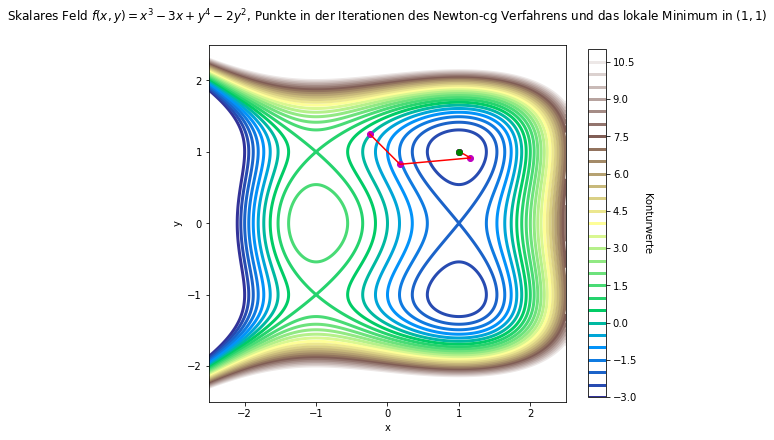

In [96]:
x_0 = np.array([-0.25, 1.25])
all_x_i = [x_0[0]]
all_y_i = [x_0[1]]
all_f_i = [f(x_0)]

result = optimize.minimize(f, 
                           x_0,
                           method='Newton-CG',
                           jac=gradient,
                           callback = store,
                           tol = 1.0e-3
                          )

fig = plt.figure(figsize=(8.0, 8.0))
ax = fig.add_subplot(111)
ax.set_aspect('equal')

cplot = plt.contour(x, y, z, 
                    levels=levels,
                    cmap=cm.terrain,
                    linewidths=3,
                    origin='lower',
                    extent=(xmin, xmax, ymin, ymax))
plt.xlabel('x')
plt.ylabel('y')
plt.plot(all_x_i, all_y_i, 'mo')
plt.plot(all_x_i, all_y_i, 'r-')
plt.plot(1.0, 1.0, 'go')
plt.title('Skalares Feld $f(x, y) = x^3 - 3x + y^4 - 2y^2$, Punkte in der Iterationen des Newton-cg Verfahrens und das lokale Minimum in $(1, 1)$',
          y=1.05,
          fontsize=12)

cbar = plt.colorbar(cplot, shrink=0.8)
cbar.ax.get_yaxis().labelpad = 15
cbar.ax.set_ylabel('Konturwerte', rotation=270)

# Aufgabenbeschreibung

## Mögliche Funktionalitäten, die in der Projektarbeit bearbeitet werden sollen
Ziel der Projektarbeit ist es, weitere Beispiele zu betrachten. In jedem Beispiel sollen möglichst alle Verfahren, die in SciPy zur Verfügung stehen eingesetzt werden.

Die folgenden Funktionalitäten sind dabei wünschenswert:
- Funktionen und Ableitungen in einem eigenem Modul, das vom Dozenten implementiert werden kann (es ist nicht Bestandteil der Arbeit, die ersten und zweiten Ableitungen einer solchen Aufgaben zu berechnen).
- Speichern der Abbildungen als png für die weitere Verwendung.
- Interaktivität wie Eingabe von Startpunkten (z.B. mit ipywidgets)
- Animierte und mit Interaktion beeinflusse Visualisierung (z.B. schrittweise Visualisierung der Punkte in der Iteration oder Ausgabe einer Animation als ganzes)
- Testen, ob die Isolinien die beste Möglichkeit für die Visualisierung ist, oder ob auch Heatmaps Sinn machen. Bei Bedarf können wir auch Code für die dreidimensionale Darstellung verwenden.
- Ersetzen von Matplotlib durch plotly.
- ...

Bemerkung: bei Bedarf ist es möglich Zugriff auf den OLAT-Kurs zu Computeroriente Mathematik zu erhalten. Dort gibt es sehr viele Folien und Aufgaben zum Thema skalare Felder und nichtlineare Optimierung.

## Abgabe
Die Abgabe erfolgt in Form eines oder mehrerer Jupyter Notebooks. Dabei soll ein Notebook auch eine Dokumentation des Vorgehens, zum Beispiel Probleme oder verworfene Ansätze, enthalten.

Es gibt ein GitHub-Repo *Python-Computing*, das man als Fork verwenden könnte. Dieser Fork könnte die Abgabe enthalten. Der Dozent würde später den Merge in das Original durchführen, so dass die Ergebnisse in der Vorlesung *Computerorientierte Mathematik* im Wintersemester 2021/22 eingesetzt werden kann.

Alternativ ist eine Abgabe der Jupyter Notebooks als zip-Archiv in OLAT möglich.